# 파일 및 라이브러리 불러오기

In [2]:
! pip install matplotlib

! pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import matplotlib.pyplot as plt
import pandas as pd

titanic = pd.read_csv('data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 그룹화해서 차트 만들기

#### 세로 막대 그래프

In [7]:
survived_gender = titanic.groupby('Sex')['Survived'].sum()
survived_gender.reset_index()

,Sex,Survived
0,female,233
1,male,109


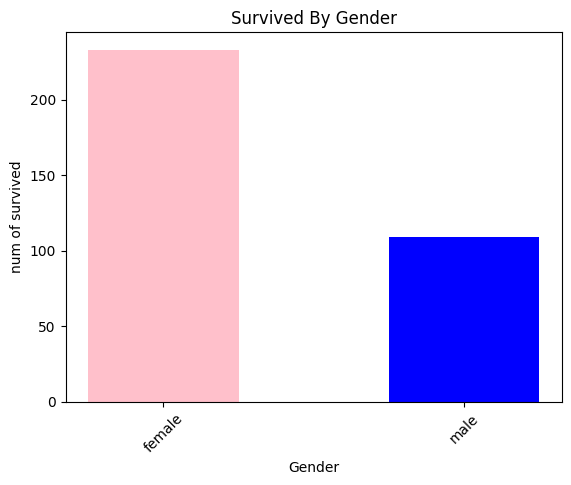

In [9]:
plt.bar(survived_gender.index, survived_gender.values, color=['pink', 'blue'], width=0.5)
plt.title('Survived By Gender')
plt.xlabel('Gender')
plt.ylabel('num of survived')
plt.xticks(rotation=45)
plt.show()

#### 파이 차트 그래프

##### 표주원 버전

In [23]:
# 성별 클래스별 생존률 pie 차트로 그려보자. 

survived_gender_plclass = titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()*100
survived_gender_plclass.reset_index()

,Sex,Pclass,Survived
0,female,1,96.808511
1,female,2,92.105263
2,female,3,50.000000
3,male,1,36.885246
4,male,2,15.740741
5,male,3,13.544669


([<matplotlib.patches.Wedge at 0x16957901400>,
 [Text(0.5799480152555199, 0.9346979723959946, 'female_1'),
  Text(-1.0861827821463492, 0.17380150680824463, 'female_2'),
  Text(-0.2931211374048003, -1.0602263903556242, 'female_3'),
  Text(0.6380626589989972, -0.8960335056185844, 'male_1'),
  Text(1.0077193356037843, -0.44102351484956853, 'male_2'),
  Text(1.0911503039085977, -0.1392516221814857, 'male_3')],
 [Text(0.3163352810484653, 0.5098352576705425, '32%'),
  Text(-0.5924633357161905, 0.09480082189540615, '30%'),
  Text(-0.1598842567662547, -0.5783053038303404, '16%'),
  Text(0.34803417763581657, -0.4887455485192278, '12%'),
  Text(0.5496650921475187, -0.24055828082703734, '5%'),
  Text(0.5951728930410531, -0.07595543028081038, '4%')])

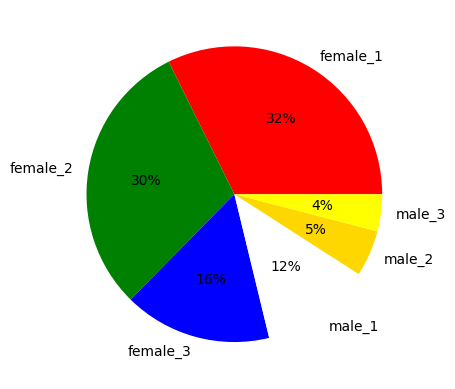

In [103]:
labels = ['female_1', 'female_2', 'female_3', 'male_1', 'male_2', 'male_3'] # 비율 구하는거 노가다..
colors = ['r','g','b','white','gold','yellow']
ratio = [32,30,16,12,5,4] 
plt.pie(ratio, labels = labels, colors = colors, autopct='%.0f%%')

##### 강사님 버전

In [20]:

survived_ = titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()
survived_ = survived_.reset_index()
survived_

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


In [24]:
survived_.iloc[:,2] = survived_['Survived']*100
survived_

,Sex,Pclass,Survived
0,female,1,9680.851064
1,female,2,9210.526316
2,female,3,5000.000000
3,male,1,3688.524590
4,male,2,1574.074074
5,male,3,1354.466859


([<matplotlib.patches.Wedge at 0x16959f9d3a0>,
 [Text(0.5972165835358224, 0.9237598997303359, 'female_1'),
  Text(-1.0782083260412474, 0.21786878081848104, 'female_2'),
  Text(-0.3322682009984413, -1.0486171096283237, 'female_3'),
  Text(0.6100230075364702, -0.9153534455477621, 'male_1'),
  Text(0.9947385860477985, -0.46956910612563363, 'male_2'),
  Text(1.0893179125842851, -0.15292640492411996, 'male_3')],
 [Text(0.32575450011044854, 0.5038690362165468, '32%'),
  Text(-0.5881136323861349, 0.11883751681008056, '30%'),
  Text(-0.18123720054460432, -0.5719729688881764, '16%'),
  Text(0.3327398222926201, -0.49928369757150654, '12%'),
  Text(0.5425846832987992, -0.25612860334125465, '5%'),
  Text(0.5941734068641554, -0.0834144026858836, '4%')])

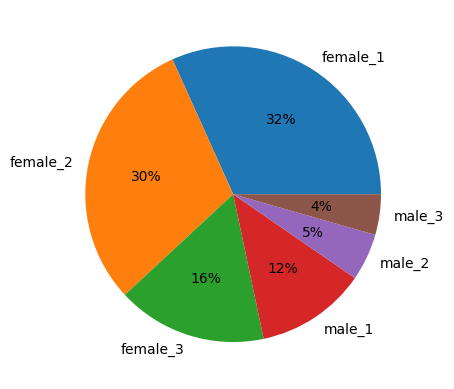

In [31]:
plt.pie(survived_['Survived'].values, # ratio에 비율을 구해서 넣을 필요 없음 값이 들어가면 알아서 계산 
        labels= ['female_1', 'female_2', 'female_3', 'male_1', 'male_2', 'male_3'], autopct='%.f%%')

### subplot 활용

In [33]:
import numpy as np
x1 = np.linspace(0, 10, 50)
x2 = np.linspace(0, 4)
x2.shape

(50,)

In [34]:
y1 = np.cos(2*np.pi*x1)
y2 = np.cos(2*np.pi*x2)

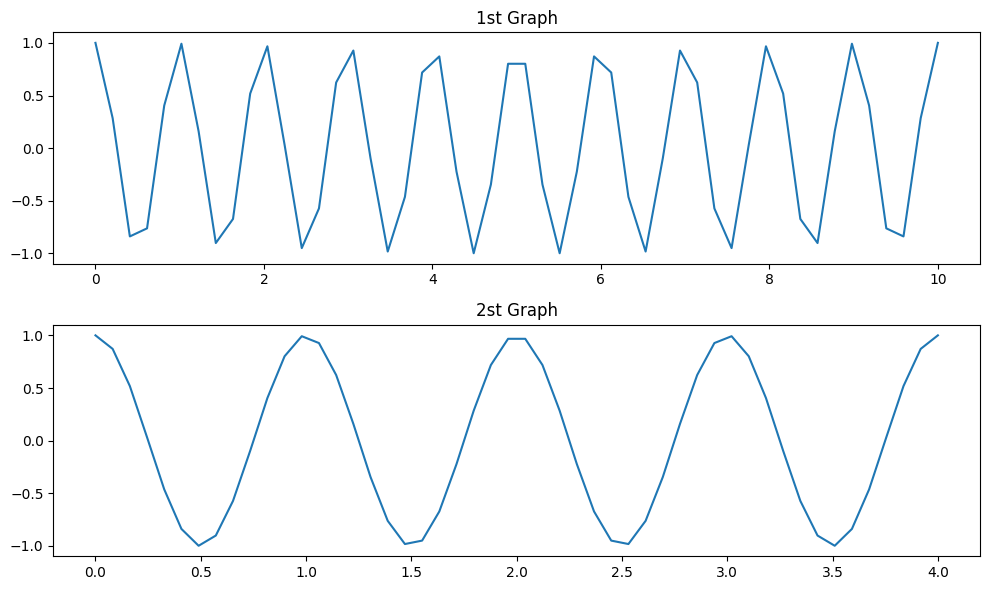

In [39]:
plt.figure(figsize=(10,6)) # 도화지 크기 설정

plt.subplot(2,1,1) # ( row 개수, col 개수, 1번째)
plt.plot(x1,y1)
plt.title
plt.title('1st Graph')

plt.subplot(2,1,2) # ( row 개수, col 개수, 2번째)
plt.plot(x2, y2)
plt.title('2st Graph')

plt.tight_layout()

plt.show()

# seaborn(데이터시각화 라이브러리)

In [56]:
! pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------------------------- ------------- 194.6/294.9 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import seaborn as sns

In [76]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 선형 회귀선(추세선)

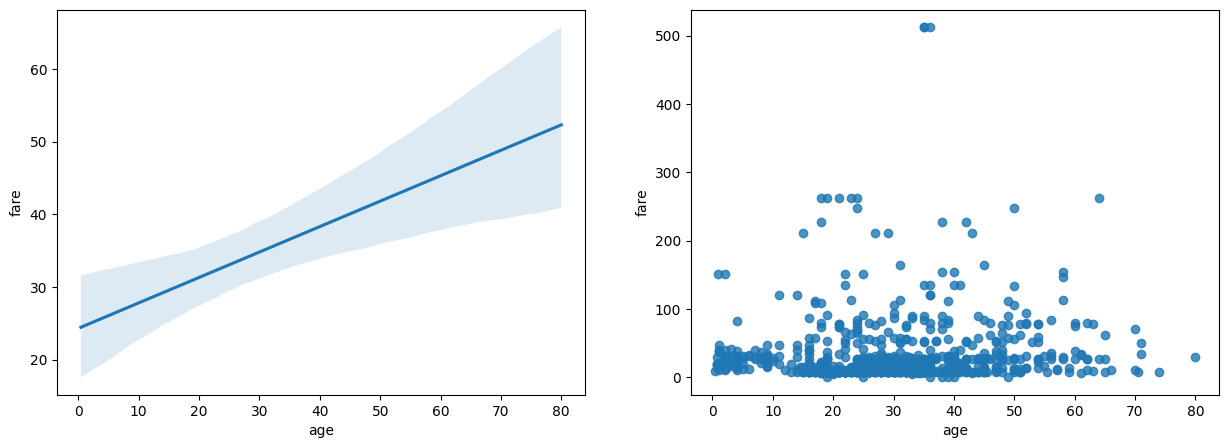

In [98]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5),alpha = 1) # 도화지 투명도 0 ~ 1
ax1 = fig.add_subplot(1, 2, 1) # 행, 열, 순서
ax2 = fig.add_subplot(1, 2, 2)

titanic.columns

# 선형회귀선(추세선), 그래프
sns.regplot(x='age', y='fare', data=titanic, ax=ax1, scatter=False) # 산점도 숨기기
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg=False) # fig_reg 회귀선 숨기기
plt.show()

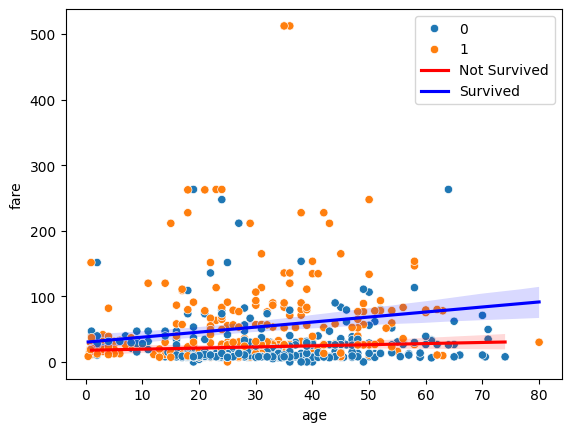

In [94]:
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic)
sns.regplot(x='age', y='fare', data=titanic[titanic['survived'] == 0], scatter=False, color='r', label='Not Survived')
sns.regplot(x='age', y='fare', data=titanic[titanic['survived'] == 1], scatter=False, color='b', label='Survived')

plt.legend()
plt.show()

### KDE(커널 밀도 추정)

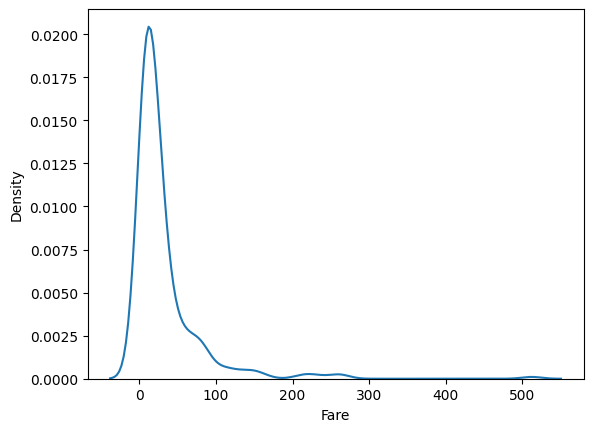

In [101]:
# KDE(Kernal Density Estimation)

sns.kdeplot(x='fare', data=titanic)
plt.xlabel('Fare')
plt.show()

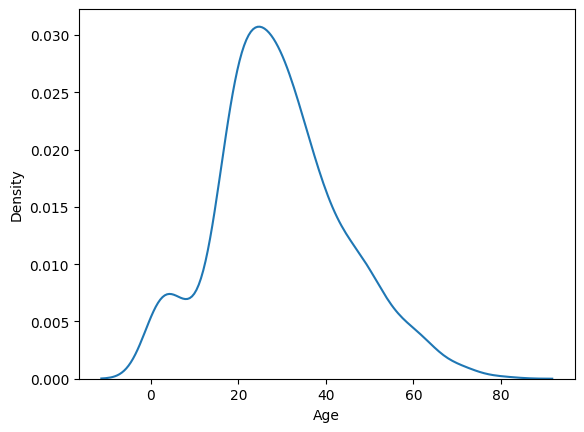

In [104]:
sns.kdeplot(x='age', data=titanic)
plt.xlabel('Age')
plt.show()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_5752\833281331.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='age', y='pclass', data=titanic, color = 'b', label='Age', shade=True) # 나이에 대한 밀도 함수, shade 밀도함수 내부 색
C:\Users\OWNER\AppData\Local\Temp\ipykernel_5752\833281331.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='age', data=titanic[titanic['survived'] == 1], color ='green', label='Survived', shade=True)


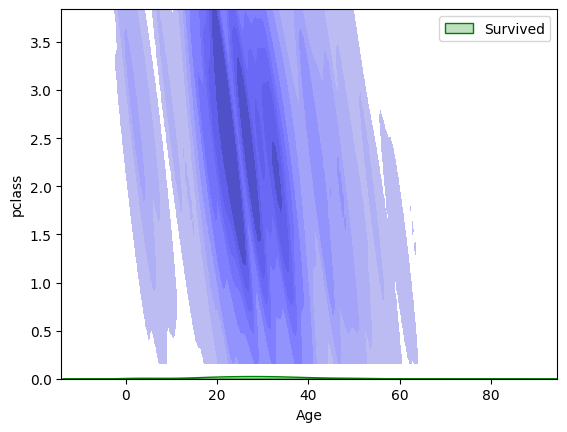

In [137]:
# 나이와 생존에 대한 시각화
sns.kdeplot(x='age', y='pclass', data=titanic, color = 'b', label='Age', shade=True) # 나이에 대한 밀도 함수, shade 밀도함수 내부 색
sns.kdeplot(x='age', data=titanic[titanic['survived'] == 1], color ='green', label='Survived', shade=True)
plt.xlabel('Age')
plt.legend()
plt.show()

### FaceGrid

c:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprec

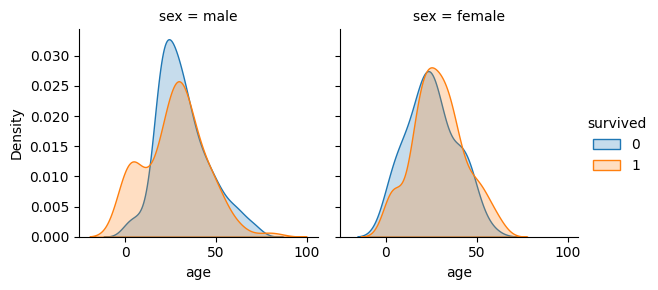

In [138]:
# 성별기준으로 나이별 생존 시각화
g = sns.FacetGrid(titanic, col='sex', hue='survived')
g.map(sns.kdeplot, 'age', shade=True)
g.add_legend()
plt.show()

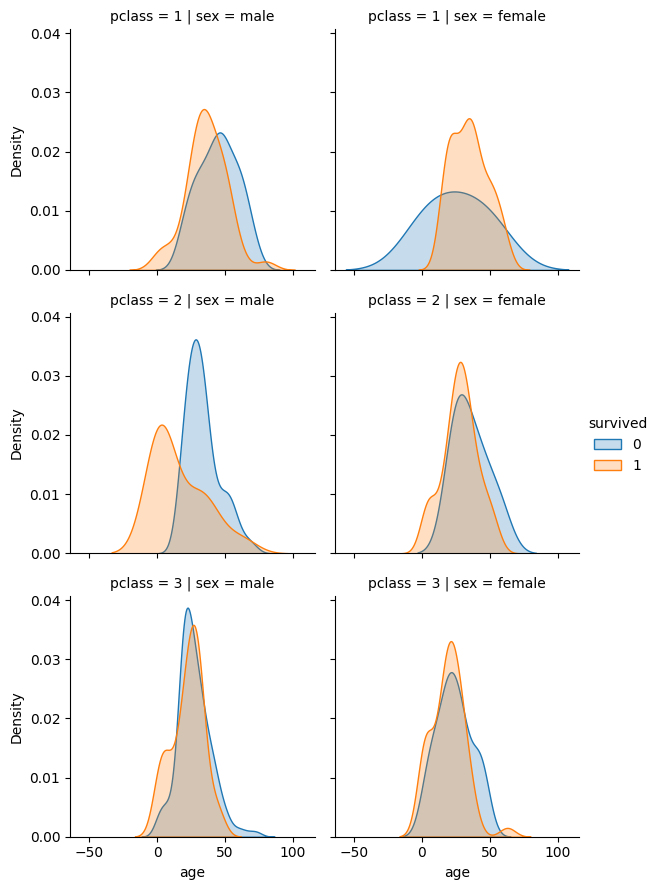

In [153]:
g = sns.FacetGrid(titanic, row='pclass', col='sex', hue='survived')
g.map(sns.kdeplot, 'age', fill = True)
g.add_legend()
plt.show()

<Axes: xlabel='fare', ylabel='age'>

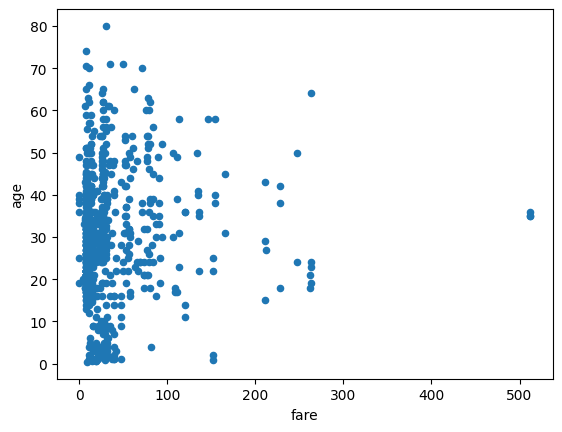

In [154]:
titanic.plot(kind="scatter", x='fare', y='age')

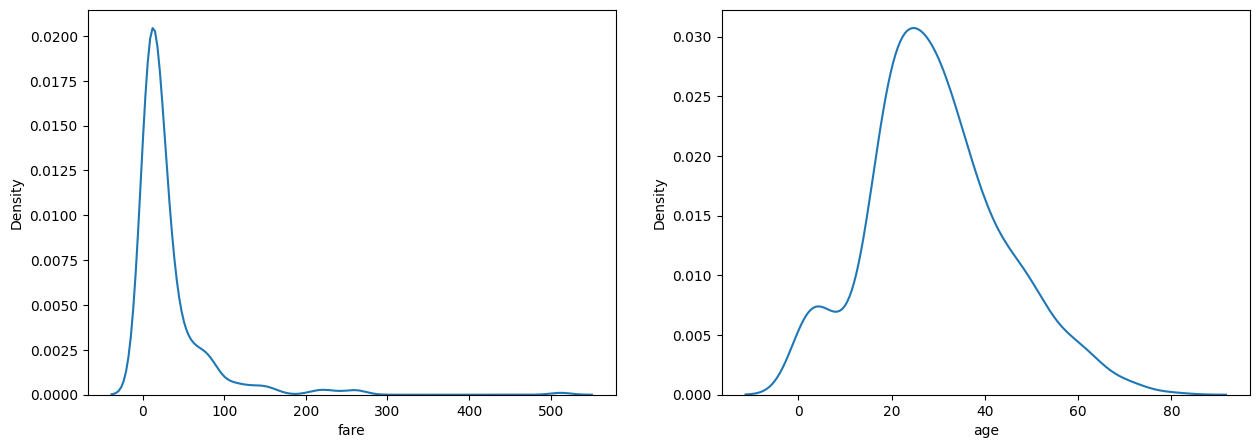

In [161]:
fig= plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.kdeplot(titanic['fare'], ax=ax1)
sns.kdeplot(titanic['age'], ax=ax2)

plt.show()

### Displot

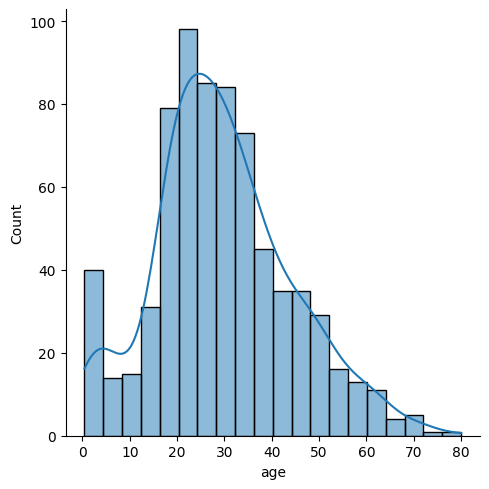

In [172]:
sns.displot(titanic['age'], kde=True) # kde = False는 막대그래프만 그리기
plt.show()

### lmplot(회귀선 + 플롯)

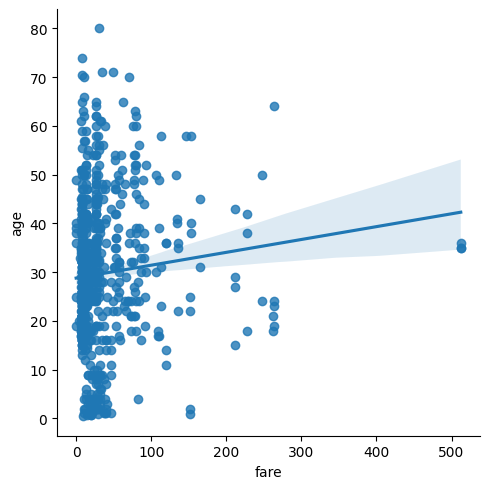

In [173]:
sns.lmplot(data=titanic, x='fare', y='age')
plt.show()

In [176]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


### Countplot

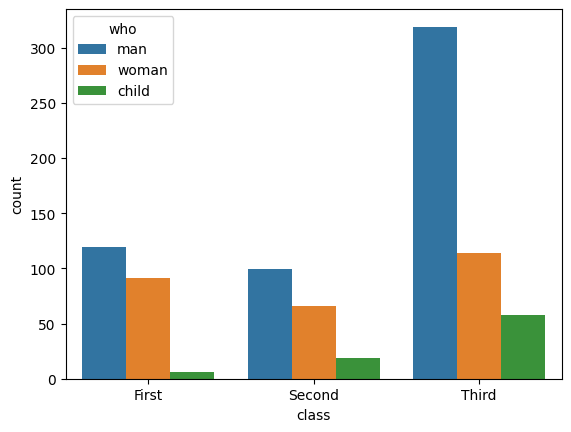

In [178]:
sns.countplot(x='class', hue='who', data=titanic)
plt.show()

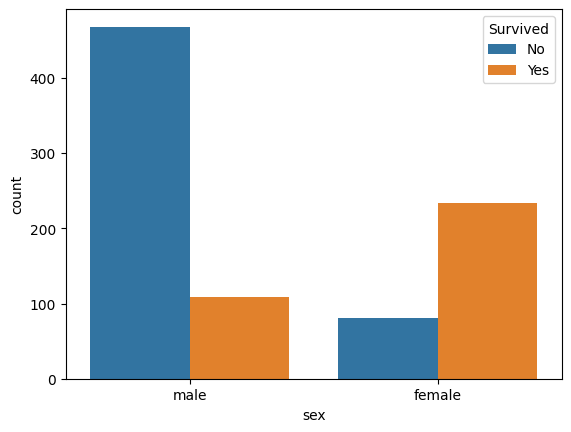

In [181]:
sns.countplot(x='sex',hue='survived', data=titanic) # x축만 지정하면 됨
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

In [183]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [185]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Histplot

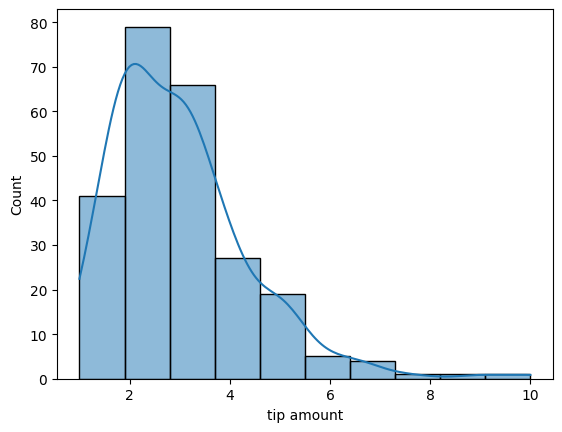

In [190]:
sns.histplot(data=tips, x='tip', bins=10, kde=True)
plt.xlabel('tip amount')
plt.show()

### Barplot

C:\Users\OWNER\AppData\Local\Temp\ipykernel_5752\172469369.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips, x='day', y='tip' , palette='Set1')


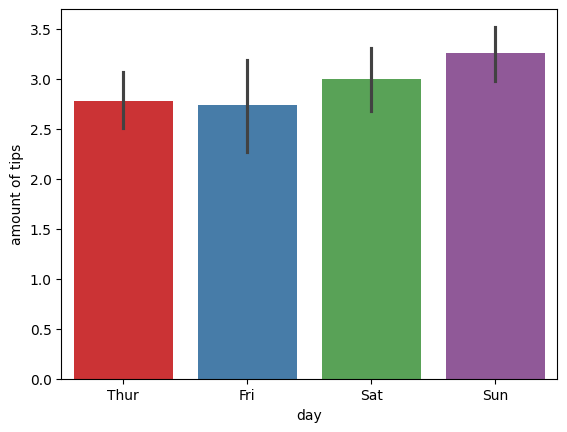

In [207]:
sns.barplot(data=tips, x='day', y='tip' , palette='Set1')
plt.xlabel('day')
plt.ylabel('amount of tips')
plt.show()

In [209]:
tips.columns
tips['time'][50:90]

50    Dinner
51    Dinner
52    Dinner
53    Dinner
54    Dinner
55    Dinner
56    Dinner
57    Dinner
58    Dinner
59    Dinner
60    Dinner
61    Dinner
62    Dinner
63    Dinner
64    Dinner
65    Dinner
66    Dinner
67    Dinner
68    Dinner
69    Dinner
70    Dinner
71    Dinner
72    Dinner
73    Dinner
74    Dinner
75    Dinner
76    Dinner
77     Lunch
78     Lunch
79     Lunch
80     Lunch
81     Lunch
82     Lunch
83     Lunch
84     Lunch
85     Lunch
86     Lunch
87     Lunch
88     Lunch
89     Lunch
Name: time, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

### Scatterplot

Text(0, 0.5, 'tip amount')

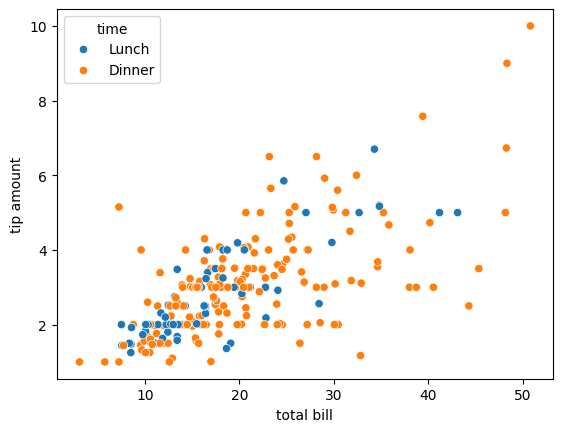

In [212]:
sns.scatterplot(data=tips, x='total_bill', y='tip',hue='time')
plt.xlabel('total bill')
plt.ylabel('tip amount')

In [242]:
# 요일 시간에 따른 식사 금액의 평균 시각화
mean_= tips.groupby(['day', 'time'])['total_bill'].mean()
mean_

C:\Users\OWNER\AppData\Local\Temp\ipykernel_5752\4026169228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_= tips.groupby(['day', 'time'])['total_bill'].mean()


day   time  
Thur  Lunch     17.664754
      Dinner    18.780000
Fri   Lunch     12.845714
      Dinner    19.663333
Sat   Lunch           NaN
      Dinner    20.441379
Sun   Lunch           NaN
      Dinner    21.410000
Name: total_bill, dtype: float64

### Lineplot

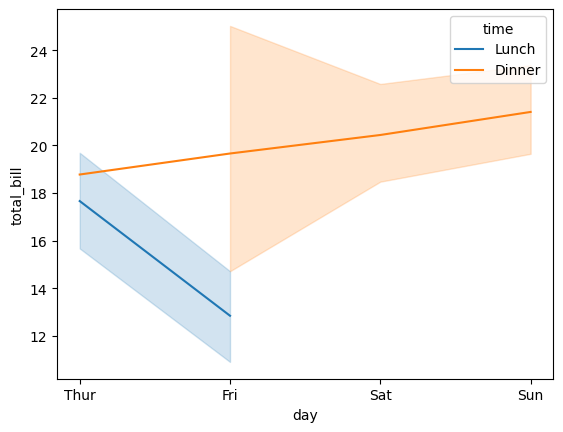

In [247]:
sns.lineplot(data=tips, x='day',y='total_bill',hue ='time', markers='o')
plt.show()

### Kdeplot

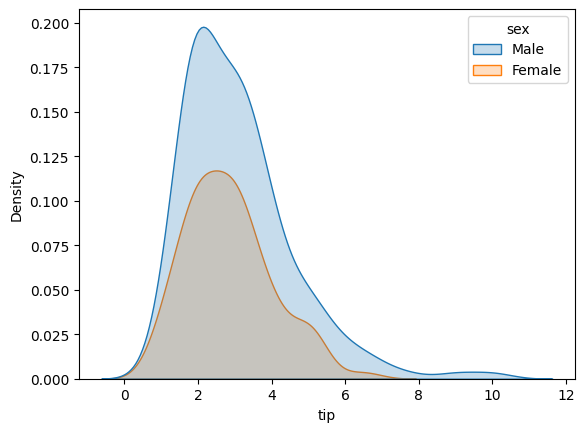

In [248]:
sns.kdeplot(data=tips, x='tip', hue='sex',fill=True)
plt.show()

### Swarmplot

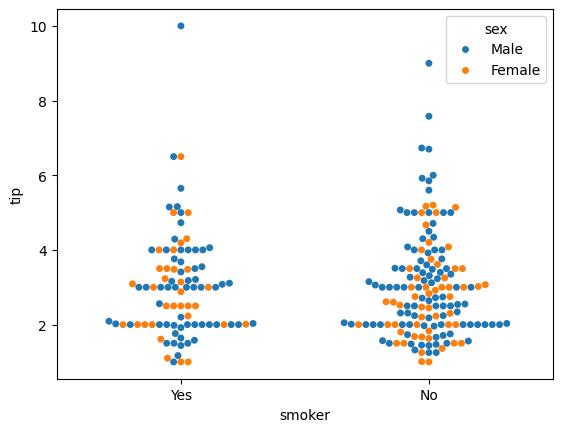

In [251]:
sns.swarmplot(data=tips, x='smoker', y='tip', hue='sex')
plt.show()

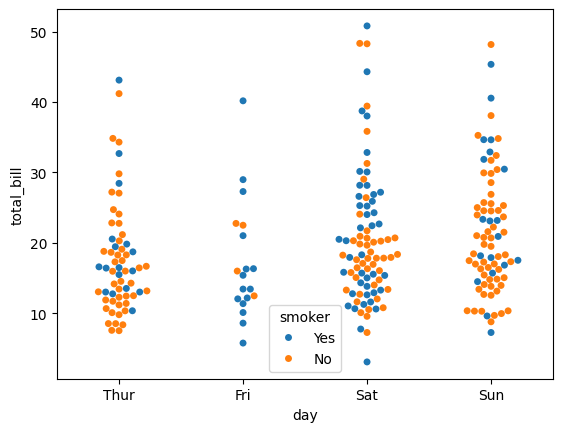

In [252]:
sns.swarmplot(x='day', y='total_bill', hue='smoker', data=tips)
plt.show()